In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set_style("darkgrid")

In [2]:
rnn = torch.load("/home/jok120/ptseq2struct/0602-rnn_q3-01_best_rnn-evalution.tch")
trf = torch.load("../0602-q3_adam-0457c_best_trans-evalution.tch")

# Plots

In [3]:
for dictionary in [rnn, trf]:
    for k, v in dictionary.items():
        dictionary[k] = np.array(v)

In [ ]:
plt.rcParams['figure.figsize'] = [6, 4]#[30.6, 20.4]
plt.rcParams.update({'font.size': 13})

In [6]:
!mkdir ../figs

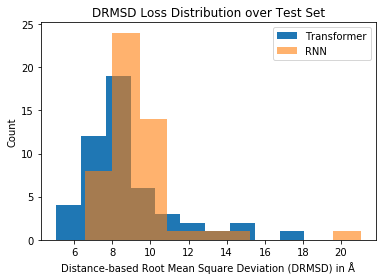

In [20]:
# sns.distplot(trf["drmsd"],kde=False, label="Transformer")
plt.hist(trf["drmsd"], label="Transformer")
# sns.distplot(rnn["drmsd"],kde=False, label="RNN")
plt.hist(rnn["drmsd"], label="RNN", alpha=0.6)
plt.legend()
plt.title("DRMSD Loss Distribution over Test Set")
plt.ylabel("Count")
plt.xlabel("Distance-based Root Mean Square Deviation (DRMSD) in Å")
plt.savefig("../figs/190603_drmsd_comparison.pdf")

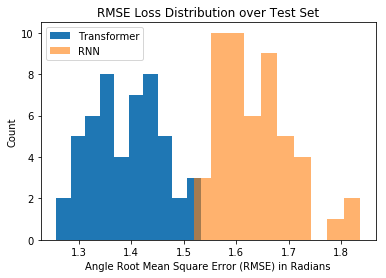

In [21]:
# sns.distplot(np.sqrt(trf["mse"]),kde=False, label="Transformer")
# sns.distplot(np.sqrt(rnn["mse"]),kde=False, label="RNN")
plt.hist(np.sqrt(trf["mse"]), label="Transformer")
plt.hist(np.sqrt(rnn["mse"]), label="RNN", alpha=0.6)
plt.legend()
plt.title("RMSE Loss Distribution over Test Set")
plt.ylabel("Count")
plt.xlabel("Angle Root Mean Square Error (RMSE) in Radians")
plt.savefig("../figs/190603_rmse_comparison.pdf")

In [23]:
np.sqrt(trf["mse"]).mean(), np.sqrt(trf["mse"]).std()

(1.3922255591729402, 0.06719894186642485)

In [24]:
np.sqrt(rnn["mse"]).mean(), np.sqrt(rnn["mse"]).std()

(1.6371754681688009, 0.06899678351956275)

In [25]:
trf["drmsd"].mean(), trf["drmsd"].std()

(8.883497505187988, 2.4316915065151554)

In [26]:
rnn["drmsd"].mean(), rnn["drmsd"].std()

(9.385813035964965, 2.140923657226397)

# Compare batch time

In [29]:
import pandas as pd
rnn_log = pd.read_csv("/home/jok120/Desktop/safekeeping/0602-rnn_q3-01.train")
trf_log = pd.read_csv("/home/jok120/Desktop/safekeeping/0602-q3_adam-0457c.train")

In [34]:
rnn_log["time"].iloc[9] - rnn_log["time"].iloc[8]

6.958365201950073

In [37]:
trf_log["time"].iloc[9] - trf_log["time"].iloc[8]

2.5513086318969727